In [1]:
%load_ext autoreload
%autoreload 2

In [53]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import pandas as pd
import seaborn as sns

from pathlib import Path
from sbibm.utils.io import get_tensor_from_csv

## validation loss

In [3]:
root = Path("/home/ben/sci/cnre/infinite/")
experiment_folders = {
    "slcp": root / "outputs/2022-04-18/17-17-25",
    "two_moons": root / "outputs/2022-04-18/18-04-06",
    "gaussian_mixture": root / "outputs/2022-04-18/18-11-35",
    "gaussian_linear_uniform": root / "outputs/2022-04-18/18-24-56",
    # "slcp-big": root / "multirun/2022-04-19/10-20-49/2",
    # "two_moons-big": root / "multirun/2022-04-19/10-20-49/0",
    # "gaussian_mixture-big": root / "multirun/2022-04-19/10-20-49/1",
    # "gaussian_linear_uniform-big": root / "multirun/2022-04-19/10-20-49/3",
}
filename = "validation_loss.csv.bz2"

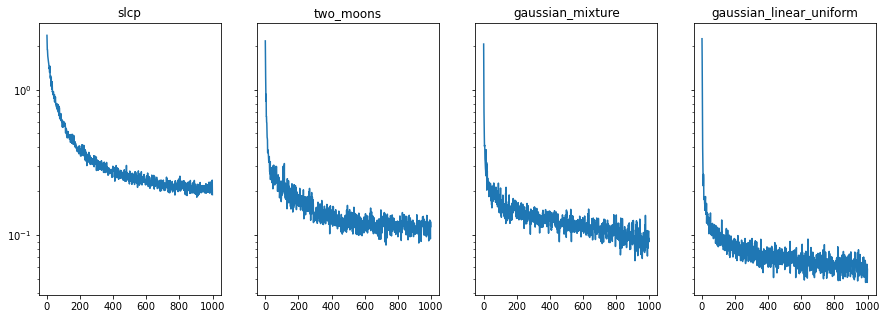

In [36]:
fig, axes = plt.subplots(ncols=len(experiment_folders), sharey="row", figsize=(15,5))
for ax, (name, experiment_folder) in zip(axes.flatten(), experiment_folders.items()):
    validation_loss = get_tensor_from_csv(experiment_folder / filename)
    ax.semilogy(validation_loss)
    # ax.loglog(validation_loss)
    ax.set_title(name)

## metrics csv

`/home/ben/sci/cnre/infinite/multirun/2022-04-22/12-33-04` "big", CNRE `slcp` & `gaussian_mixture`, reuse=True  
`/home/ben/sci/cnre/infinite/multirun/2022-04-28/11-48-27` "big", CNRE `two_moons`, reuse=True  
`/home/ben/sci/cnre/infinite/multirun/2022-04-28/21-08-52` "big", NRE, `slcp` & `gaussian_mixture` & `two_moons`, reuse=True  


`/home/ben/sci/cnre/infinite/multirun/2022-04-29/*` two "big" runs, CNRE, `gaussian_mixture`, reuse=True  

`/home/ben/sci/cnre/infinite/multirun/2022-04-30/17-32-15/` CNRE, `slcp`, `two_moons`, `gaussian_mixture`, reuse=False  

In [76]:
files = [
    # "metrics01.csv", 
    # "metrics02.csv", 
    "metrics-512.csv", 
    "metrics-512b.csv", 
    "metrics-reuse-false.csv" 
]
df = pd.concat([pd.read_csv(file, index_col=0) for file in files], ignore_index=True)
print(len(df))
print(df.columns)
print(df["algorithm"].unique())
df.head()

183
Index(['task', 'seed', 'algorithm', 'num_atoms', 'gamma', 'extra_theta_factor',
       'hidden_features', 'num_blocks', 'AVG_LOG_RATIO', 'RT', 'C2ST_Z-01',
       'MMD-01', 'MEDDIST-01', 'NLTP-01', 'C2ST_Z-02', 'MMD-02', 'MEDDIST-02',
       'NLTP-02', 'C2ST_Z-03', 'MMD-03', 'MEDDIST-03', 'NLTP-03', 'C2ST_Z-04',
       'MMD-04', 'MEDDIST-04', 'NLTP-04', 'C2ST_Z-05', 'MMD-05', 'MEDDIST-05',
       'NLTP-05', 'C2ST_Z-06', 'MMD-06', 'MEDDIST-06', 'NLTP-06', 'C2ST_Z-07',
       'MMD-07', 'MEDDIST-07', 'NLTP-07', 'C2ST_Z-08', 'MMD-08', 'MEDDIST-08',
       'NLTP-08', 'C2ST_Z-09', 'MMD-09', 'MEDDIST-09', 'NLTP-09', 'C2ST_Z-10',
       'MMD-10', 'MEDDIST-10', 'NLTP-10', 'NLTP', 'num_simulations_simulator',
       'path', 'folder', 'reuse'],
      dtype='object')
['CNRE' 'NRE-B']


,task,seed,algorithm,num_atoms,gamma,extra_theta_factor,hidden_features,num_blocks,AVG_LOG_RATIO,RT,...,NLTP-09,C2ST_Z-10,MMD-10,MEDDIST-10,NLTP-10,NLTP,num_simulations_simulator,path,folder,reuse
0,slcp,2056118775,CNRE,2,1.00,0,128,3,5.214563,35.655302,...,NaN,0.75610,0.013310,2.438480,NaN,NaN,21508096.0,/home/ben/sci/cnre/infinite/multirun/2022-04-2...,15,NaN
1,gaussian_mixture,1675706547,CNRE,10,0.01,0,128,3,6.558360,32.233315,...,NaN,0.72935,0.045406,0.893024,NaN,NaN,21508096.0,/home/ben/sci/cnre/infinite/multirun/2022-04-2...,5,NaN
2,slcp,117746846,CNRE,25,0.10,0,128,3,8.990162,102.423283,...,NaN,0.71270,0.031580,2.238248,NaN,NaN,21508096.0,/home/ben/sci/cnre/infinite/multirun/2022-04-2...,22,NaN
3,slcp,3080527505,CNRE,75,0.10,0,128,3,10.374908,235.655876,...,NaN,0.67820,0.019546,2.142513,NaN,NaN,21508096.0,/home/ben/sci/cnre/infinite/multirun/2022-04-2...,28,NaN
4,gaussian_mixture,1342128249,CNRE,50,1.00,0,128,3,8.420526,113.035620,...,NaN,0.70915,0.026139,0.877700,NaN,NaN,21508096.0,/home/ben/sci/cnre/infinite/multirun/2022-04-2...,9,NaN


In [77]:
# groupby drops NaNs fix this here.
df["gamma"] = df["gamma"].fillna(1.0)

df_wide = pd.wide_to_long(
    df, 
    ["C2ST_Z"], 
    i=["task", "algorithm", "num_atoms", "gamma", "num_blocks", "hidden_features", "reuse"], 
    j="num_observation", 
    sep="-"
)

# groupby drops NaNs
df_wide.groupby([
    "task",
    "algorithm",
    "num_atoms",
    "gamma",
    "num_blocks",
    "hidden_features",
]).aggregate({
    "C2ST_Z": ["mean", "std"],
})

C2ST_Z  \
                                                                            mean   
task             algorithm num_atoms gamma  num_blocks hidden_features             
gaussian_mixture CNRE      2         0.01   3          128              0.776525   
                                     0.10   3          128              0.782852   
                                     1.00   3          128              0.779357   
                                     10.00  3          128              0.831555   
                                     100.00 3          128              0.837905   
...                                                                          ...   
two_moons        NRE-B     10        1.00   3          128              0.625350   
                           25        1.00   3          128              0.603955   
                           50        1.00   3          128              0.556855   
                           75        1.00   3          128              0.560855   
                           100       1.00   3          128              0.561485   

                                                                                  
                                                                             std  
task             algorithm num_atoms gamma  num_blocks hidden_features            
gaussian_mixture CNRE      2         0.01   3          128              0.019053  
                                     0.10   3          128              0.037192  
                                     1.00   3          128              0.043362  
                                     10.00  3          128              0.008713  
                                     100.00 3          128              0.008540  
...                                                                          ...  
two_moons        NRE-B     10        1.00   3          128              0.018070  
                           25        1.00   3          128              0.041253  
                           50        1.00   3          128              0.040749  
                           75        1.00   3          128              0.044534  
                           100       1.00   3          128              0.035746  

[138 rows x 2 columns]

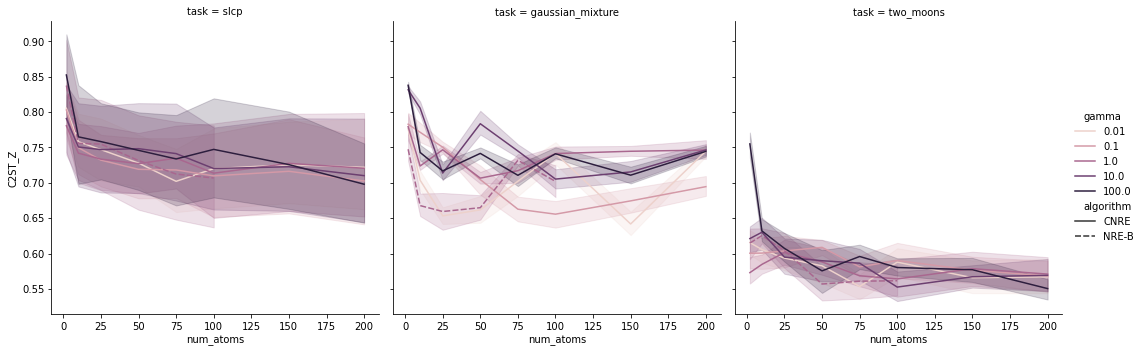

In [78]:
sns.relplot(
    data=df_wide,
    x="num_atoms",
    y="C2ST_Z",
    hue="gamma",
    style="algorithm",
    col="task",
    kind="line",
    hue_norm=LogNorm(),
)

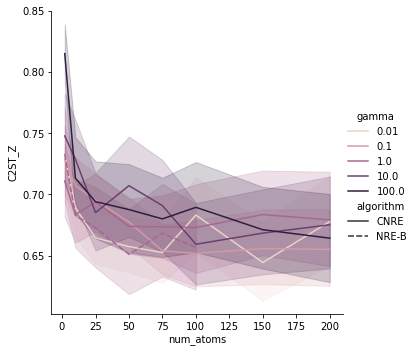

In [79]:
sns.relplot(
    data=df_wide,
    x="num_atoms",
    y="C2ST_Z",
    hue="gamma",
    style="algorithm",
    # col="task",
    kind="line",
    hue_norm=LogNorm(),
)